<a href="https://colab.research.google.com/github/Jojocko/buzzode/blob/master/jo's_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', 100)

df = pd.read_csv('/content/drive/My Drive/dataset.csv')
df.head(20)



,Commentaire,star,date,client,reponse,source,company,langage,cleaned_words,cleaned_lemma,Sentiment
0,"Colis commandé mardi 28 fevrier 23 , livraison le jeudi 02 mars 23 produit non recu au 7 mars 23Au prix du colis, amazon des incapables et chronopost pareilService client qui veule que je patiente une journée de plusLe colis est introuvable et meme chronopost renvoie la balle a amazonAmazon veut pas me renvoyé un autre article alors que ca fait une semaine que j'attend ce colis",1,2023-03-07,Toto,NaN,TrustPilot,Amazon,fr,colis commandé mardi fevrier livraison jeudi mars produit non recu mars 23au prix colis amazon incapables chronopost pareilservice client veule patiente journée plusle colis introuvable chronopost renvoie balle amazonamazon veut renvoyé article ca semaine attend colis,colis commander mardi fevrier livraison jeudi mars produit non recu mars 23au prix colis amazon incapable chronopost pareilservic client veule patient journée plusle colis introuvable chronopost renvoyer balle amazonamazon vouloir renvoyer article ca semaine attendre colis,__label__NEGATIVE
1,Amazon avec sa politique de retour est la pire que j ai vu contrairement a d autre site marchand.Montre défectueuse rendu il y a 10 jours et toujours pas de remboursement ce sont des méthodes de voleurs et de voyous et au téléphone il n y a que des incompétents et personne n a la même version de jours de retourAmazon c est a fuir dernière fois que je commande chez eux la concurrence est plus professionnelle.,1,2023-03-07,nasri eddine,NaN,TrustPilot,Amazon,fr,amazon politique pire contrairement site marchand.montre défectueuse rendu jours remboursement méthodes voleurs voyous téléphone incompétents version jours retouramazon fuir dernière fois commande concurrence professionnelle,amazon politique pire contrairement site marchand.montr défectueux rendre jour remboursement méthode voleur voyou téléphone incompétent version jour retouramazon fuir dernier fois commande concurrence professionnel,__label__NEGATIVE
2,"Dieu sait que j'en connais des déboires avec les sites marchands. Amazon n'échappe pas à la règle, il m'arrive d'expérimenter quelques désagréments. CEPENDANT, je n'ai rien à redire sur le service client d'Amazon. Les agents sont vraiment tournés vers la satisfaction du client. Ca change des autres commerces. Etant Prime, les livraisons rapides et retours gratuits sont très appréciables. Les autres commerces devraient s'en inspirer !!!",4,2023-03-07,Amandine,NaN,TrustPilot,Amazon,fr,dieu connais déboires sites marchands amazon échappe règle arrive expérimenter désagréments rien redire service client amazon agents vraiment tournés satisfaction client ca change commerces prime livraisons rapides retours gratuits appréciables commerces devraient inspirer,dieu connaître déboire site marchand amazon échapper règle arriver expérimenter désagrément rien redire service client amazon agent vraiment tourner satisfaction client ca changer commerce prime livraison rapide retour gratuit appréciable commerce devoir inspirer,__label__POSITIVE
3,"Nul, preleve une commande que je n'ai jamais reçu et le service client laisse des blancs jusqu'à ce qu'on raccroche et ça sur plusieurs appel. Donc amazone ma volé Dernière commande pour moi passé chez eux, ça m'apprendras à vouloir acheter chez les americains",1,2023-03-07,Bob Brico,NaN,TrustPilot,Amazon,fr,preleve commande jamais reçu service client laisse blancs jusqu' raccroche appel amazone volé dernière commande passé apprendras vouloir acheter americains,prelev commande jamais recevoir service client laisse blanc jusque raccrocher appel amazone voler dernier commande passer apprendre vouloir acheter americain,__label__NEGATIVE
4,Colis soit disant livré mais jamais reçu donc perdu non remboursé et falsification du bon de livraison soit disant signé par mes soins (Signature en majuscule) MDR je ne signe jamais de documents en majuscule ils moquent de leurs clients je vais résilier mon aboment Amazon Prime et en finir ave

In [ ]:
df.columns



Index(['Commentaire', 'star', 'date', 'client', 'reponse', 'source', 'company', 'langage',
       'cleaned_words', 'cleaned_lemma', 'Sentiment'],
      dtype='object')

In [ ]:
df = df.drop(['client', 'langage', 'reponse'], axis=1)
df.rename(columns={'Sentiment': 'sentiment', 'Commentaire': 'commentaire'}, inplace=True)
df['sentiment'] = df['sentiment'].replace({'__label__POSITIVE': 'positif', '__label__NEGATIVE': 'negatif'})
df['date'] = df['date'].fillna(method="ffill")
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year # pour visualiser par année et non par jour/mois/année




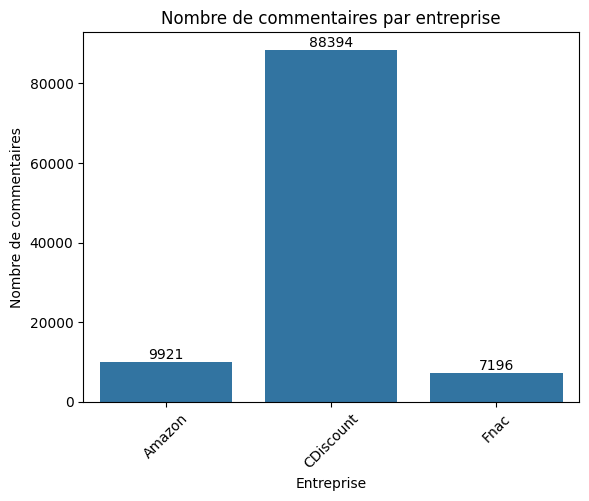

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Nb de commentaires par entreprise

nb_commentaires = df.groupby('company')['commentaire'].count() # nb de commentaires par entreprise

sns.barplot(x=nb_commentaires.index, y=nb_commentaires.values)
plt.xlabel('Entreprise')
plt.ylabel('Nombre de commentaires')
plt.title('Nombre de commentaires par entreprise')
plt.xticks(rotation=45)
for index, value in enumerate(nb_commentaires.values):
    plt.text(index, value, str(value), ha='center', va='bottom')
plt.show()




On observe que le dataset n'est pas représentatif, avec beaucoup plus de commentaires pour CDiscount.

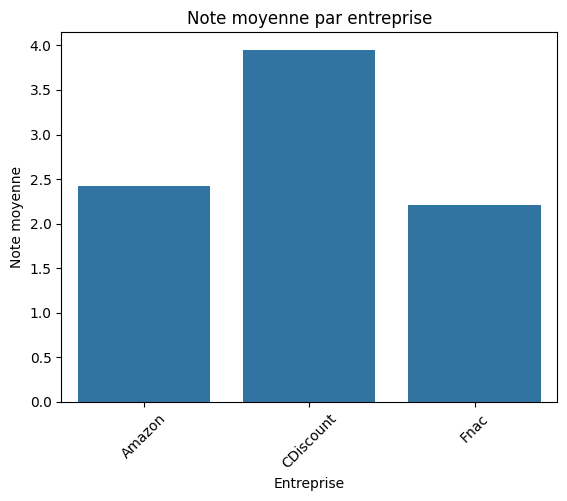

In [ ]:
# Note moyenne par entreprise

notes = df.groupby('company').agg({'star': 'mean'}) # répartition des notes par entreprise

sns.barplot(x=notes.index, y=notes['star'])
plt.xlabel('Entreprise')
plt.ylabel('Note moyenne')
plt.title('Note moyenne par entreprise')
plt.xticks(rotation=45)
plt.show()



Sans rentrer dans les détails chronologiques, CDiscount est mieux notée que Fnac et Amazon sur une période d'une dizaine d'années.



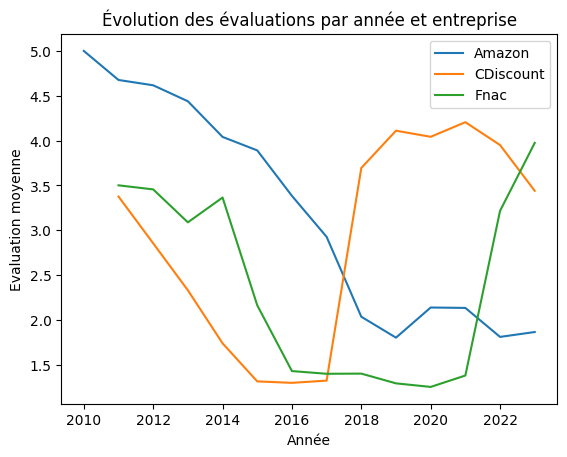

In [ ]:
# Évolution des évaluations

evolution = df.groupby([df['date'].dt.year, 'company']).agg({'star': 'mean'}) # évolution des notes par année et entreprise

for company in evolution['star'].unstack().columns:
    plt.plot(evolution['star'].unstack()[company], label=company)

plt.xlabel('Année')
plt.ylabel('Evaluation moyenne')
plt.title('Évolution des évaluations par année et entreprise')
plt.legend()
plt.show()


L'analyse chronologique montre que pour CDiscount, la note moyenne a escaladé en 2017, alors que la tendance générale pour Amazon est à la baisse et que pour Fnac, la hausse des notes débute en 2021. Il serait alors intéressant de voir si la hausse des notes correspond à une hausse ou baisse du nombre de commentaires.


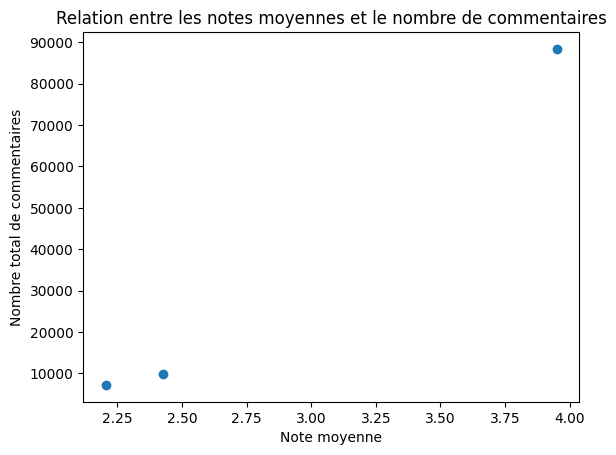

In [ ]:
# Relation entre nb de commentaires et notes moyennes

plt.figure
plt.scatter(notes['star'], nb_commentaires.values)

plt.xlabel('Note moyenne')
plt.ylabel('Nombre total de commentaires')
plt.title('Relation entre les notes moyennes et le nombre de commentaires')

plt.show()


Il est clair que pour CDiscount, plus le nombre de commentaires augmente, plus la note moyenne augmente aussi.


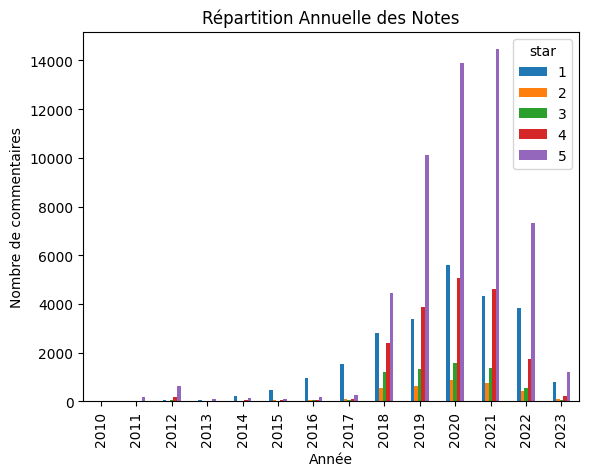

In [ ]:
# Répartition annuelle des notes

repartition_annuelle = df.groupby('year')['star'].value_counts().unstack()

repartition_annuelle.plot(kind='bar')
plt.xlabel('Année')
plt.ylabel('Nombre de commentaires')
plt.title('Répartition Annuelle des Notes')
plt.show()


On observe que sans disinction d'entreprise, les meilleures notes (4, 5 étoiles) apparaissent entre 2018 et 2022, avec un pic en 2020. Est-ce en relation avec le début de la crise Covid en 2020 lorsqu'on ne pouvait plus se déplacer en magasin ?
Il est néanmoins important de rappeler que notre dataset contient un plus grand nombre de commentaires provenant de CDiscount. Cette surreprésentation pourrait potentiellement biaiser l'aperçu général des tendances des notes.
Voyons maintenant un aperçu général de la fréquence des mots dans les commentaires positifs et négatifs.

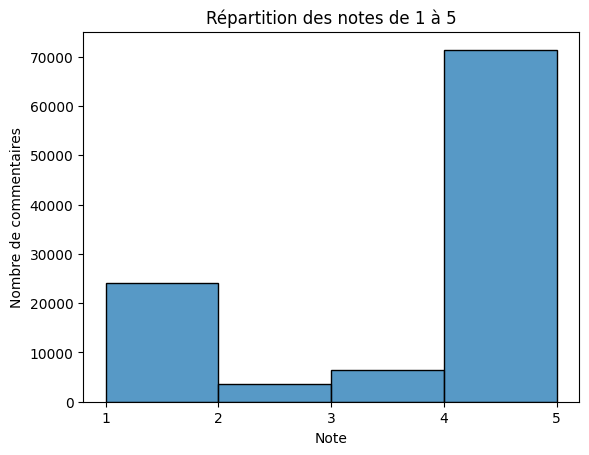

In [ ]:
# Répartition des notes

plt.figure
sns.histplot(data=df, x='star', binwidth=1, kde=False)

plt.xlabel('Note')
plt.ylabel('Nombre de commentaires')
plt.title('Répartition des notes de 1 à 5')
plt.xticks(range(1, 6))
plt.show()


Les notes 2 et 3 sont sous-représentés, indiquant que les internautes écrivent des commentaires pour dire qu'ils sont soit très satisfaits ou soit très insatisfaits.


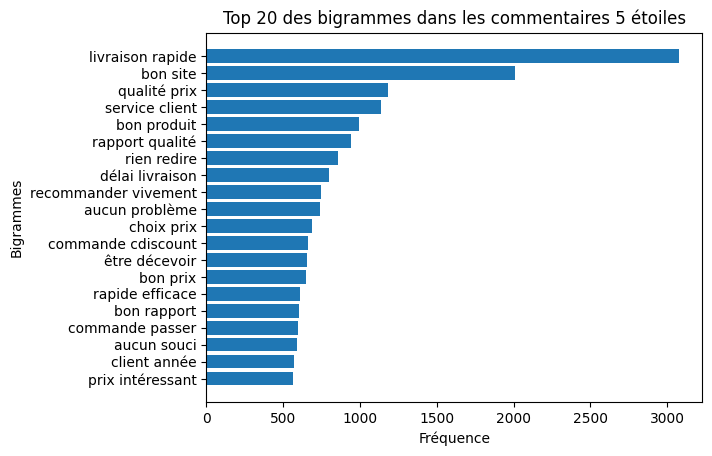

In [ ]:

from nltk import bigrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
import nltk

stop_words = set(stopwords.words('french'))
adverbes = {'très', 'beaucoup', 'bien', 'mal', 'ainsi', 'aussi', 'toujours', 'jamais', 'vraiment', 'particulièrement', 'souvent'}
stop_words.update(adverbes)

# Filtrage des commentaires à 5 étoiles
df_5_stars = df[df['star'] == 5]
text_5_stars = ' '.join(df_5_stars['cleaned_lemma'].dropna())

# Tokenisation et suppresion des stopwords
words = [word for word in word_tokenize(text_5_stars.lower()) if word.isalpha() and word not in stop_words]

# Bigramme
bigrammes = list(bigrams(words))
bigramme_freq = Counter(bigrammes)
top_20_bigrammes = bigramme_freq.most_common(20)

bigrammes_labels = [' '.join(bigram) for bigram, freq in top_20_bigrammes]
frequences = [freq for bigram, freq in top_20_bigrammes]

plt.figure
plt.barh(bigrammes_labels, frequences)
plt.xlabel('Fréquence')
plt.ylabel('Bigrammes')
plt.title('Top 20 des bigrammes dans les commentaires 5 étoiles')
plt.gca().invert_yaxis()
plt.show()


Ce bigramme indique que la note de 5 étoiles est largement influencée par la livraison rapide.

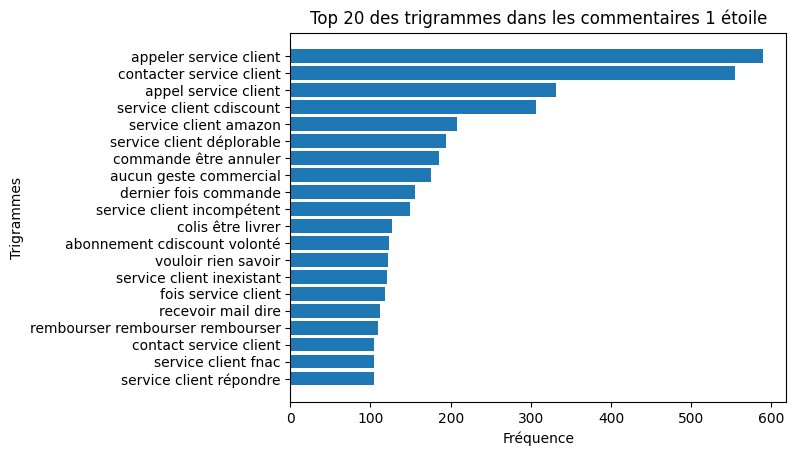

In [ ]:
from nltk import trigrams

# Filtrage des commentaires à 1 étoile
df_1_stars = df[df['star'] == 1]
text_1_stars = ' '.join(df_1_stars['cleaned_lemma'].dropna())

# Tokenisation et suppression des stopwords
words = [word for word in word_tokenize(text_1_stars.lower()) if word.isalpha() and word not in stop_words]

# Trigramme
trigrammes = list(trigrams(words))
trigramme_freq = Counter(trigrammes)
top_20_trigrammes = trigramme_freq.most_common(20)
trigrammes_labels = [' '.join(trigram) for trigram, freq in top_20_trigrammes]
frequences = [freq for trigram, freq in top_20_trigrammes]

plt.figure
plt.barh(trigrammes_labels, frequences)
plt.xlabel('Fréquence')
plt.ylabel('Trigrammes')
plt.title('Top 20 des trigrammes dans les commentaires 1 étoile')
plt.gca().invert_yaxis()
plt.show()



Ce bigramme indique une évaluation négative du service client, que ce soit chez Fnac, Amazon ou CDiscount.